# K-Means

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [4]:
data = pd.read_csv("Mall_Customers.csv")

In [316]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Hacer un describe de la tabla y analizar los valores

In [317]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Verificar si es que hay datos faltantes

In [318]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Realizar un histograma de las 3 variables numéricas

In [319]:
print(data.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


<Axes: xlabel='Age', ylabel='Count'>

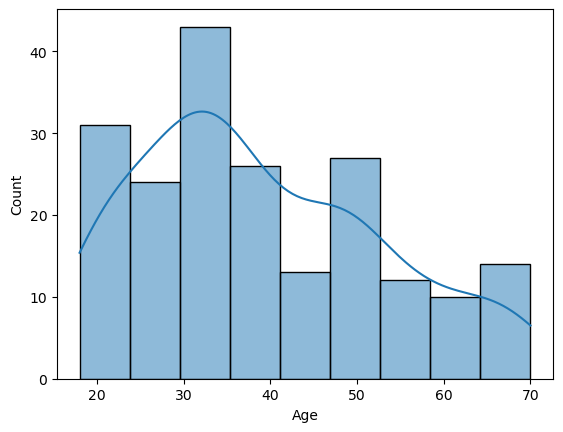

In [320]:
sns.histplot(data['Age'], kde = True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

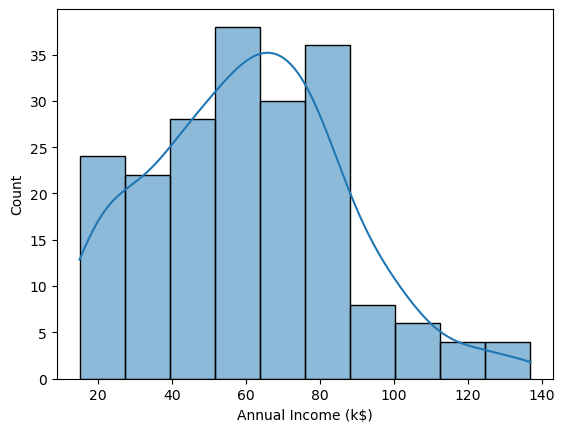

In [321]:
sns.histplot(data['Annual Income (k$)'], kde = True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

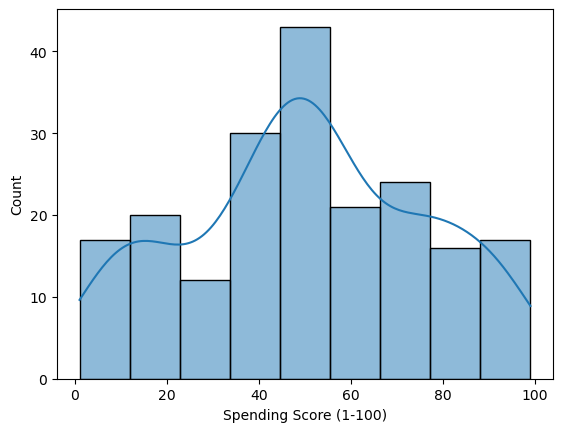

In [322]:
sns.histplot(data['Spending Score (1-100)'], kde = True)

Realizar gráfico de barras mostrando cantidad de hombres y mujeres

<Axes: xlabel='Gender', ylabel='count'>

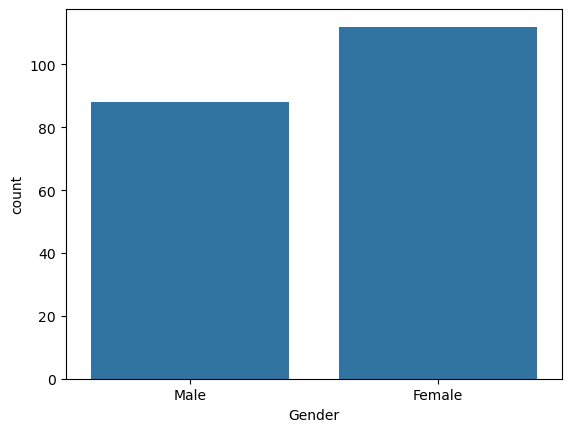

In [323]:
sns.countplot(x=data["Gender"])

Analizar correlación entre las 3 columnas numéricas.

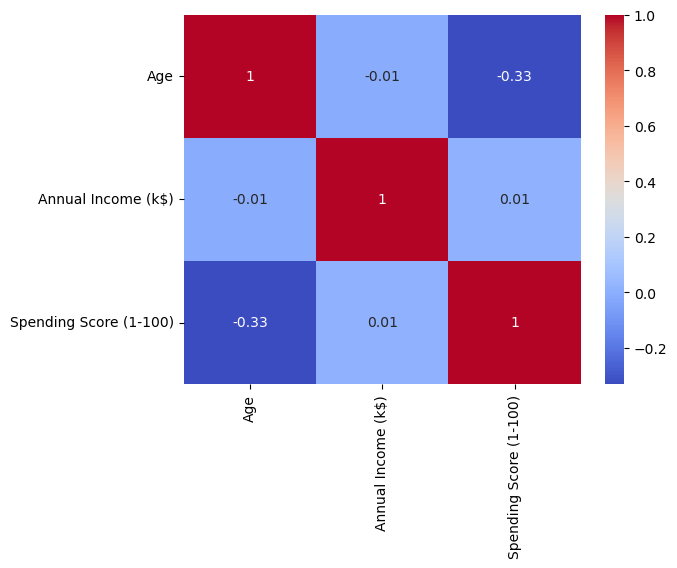

In [324]:
datos_numericos = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
sns.heatmap(datos_numericos.corr().round(2), cmap="coolwarm", annot=True)
plt.show()

In [325]:
np.linalg.det(data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr())

0.8927511645304761

Normalizar los datos de la tabla.

In [326]:
print(data.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [327]:
data_normalizada = data

In [328]:
data_normalizada["Gender"]= data_normalizada["Gender"].map({"Male": 0, "Female": 1})

In [329]:
data_normalizada.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [330]:
data_normalizada = (data - data.min()) / (data.max() - data.min())
data_normalizada.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.0,0.019231,0.000000,0.387755
1,0.005025,0.0,0.057692,0.000000,0.816327
2,0.010050,1.0,0.038462,0.008197,0.051020
3,0.015075,1.0,0.096154,0.008197,0.775510
4,0.020101,1.0,0.250000,0.016393,0.397959


Realizar clusterización con las columnas Age y Annual Income (k$)
   * Analizar con el metodo del codo el número de cluster óptimo
   * Agregar columna con cluster a copia dataset
   * Graficar los clusters
   * Calcular silueta

In [331]:
data_copia = data_normalizada[["Age", "Annual Income (k$)"]]

In [332]:
acum = []
for i in range(1,10):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10,
        max_iter = 300
    )
    modelo.fit(data_copia)
    acum.append([i, modelo.inertia_])

C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

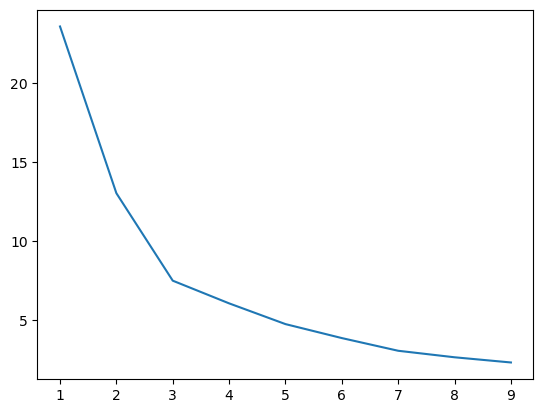

In [333]:
sns.lineplot(
    x = np.array(acum)[:,0],
    y = np.array(acum)[:, 1]
)

In [334]:
modelo = KMeans(
    n_clusters = 3,
    n_init = 10,
    max_iter = 300
)
modelo.fit(data_copia)

C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [335]:
data["cluster"] = modelo.labels_

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

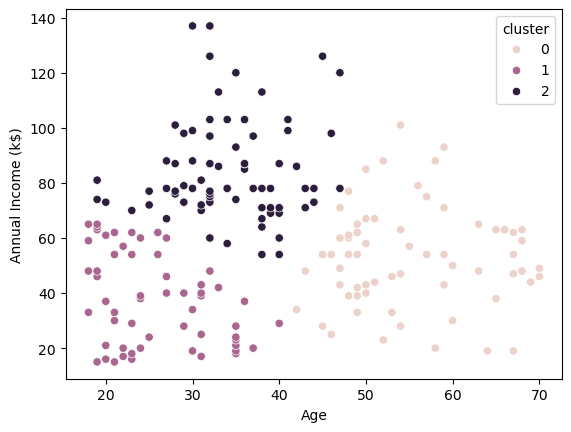

In [336]:
sns.scatterplot(data= data, x="Age", y = "Annual Income (k$)", hue = "cluster")

In [337]:
silhouette_score(data_copia, modelo.labels_)

0.4442207276553034

Realizar clusterización con las columnas Annual Income (k$) y Spending Score (1-100)
   * Analizar con el metodo del codo el número de cluster óptimo
   * Agregar columna con cluster a copia dataset
   * Graficar los clusters
   * Calcular silueta

In [338]:
data_copia = data_normalizada[["Spending Score (1-100)", "Annual Income (k$)"]]

In [339]:
acum = []
for i in range(1,10):
    modelo = KMeans(
        n_clusters = i,
        n_init = 10,
        max_iter = 300
    )
    modelo.fit(data_copia)
    acum.append([i, modelo.inertia_])

C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

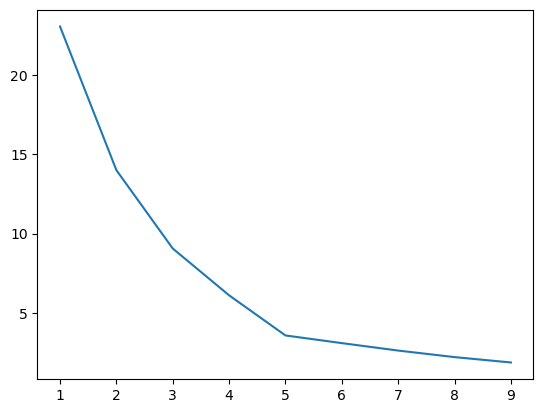

In [340]:
sns.lineplot(
    x = np.array(acum)[:,0], # numero de cluster
    y = np.array(acum)[:, 1] # error cada cluster
)

In [341]:
modelo = KMeans(
    n_clusters = 5,
    n_init = 10,
    max_iter = 300
)
modelo.fit(data_copia)

C:\Users\ivan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=10)

In [342]:
data["cluster"] = modelo.labels_

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

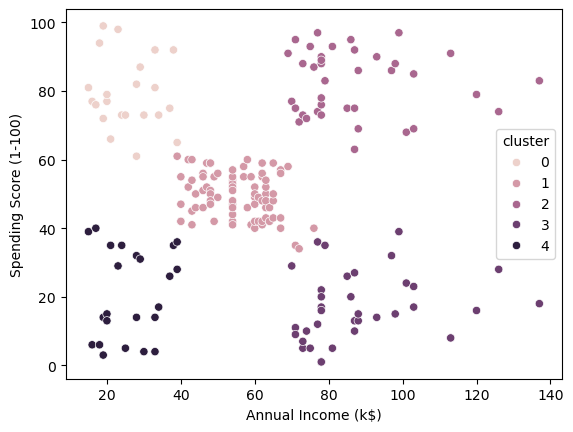

In [343]:
sns.scatterplot(
    data = data,
    x = "Annual Income (k$)",
    y = "Spending Score (1-100)",
    hue = "cluster"
)

In [344]:
silhouette_score(data_copia, modelo.labels_)

0.5594854531357839

In [351]:
data.groupby("cluster").mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,,
0,23.00,0.608696,45.217391,26.304348,20.913043
1,162.00,0.538462,32.692308,86.538462,82.128205
2,162.00,0.473684,40.394737,87.000000,18.631579
3,70.97,0.590000,39.200000,48.260000,56.480000
